
# Project: Investigating The Gapminder Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project uses the Gapminder data which is a collection of Macroeconomic data from multiple countries around the world put together by a neutral Swedish think tank. Specifically we would be examining how Child Mortality has changed over the years and we would also examine some of the likely factors that might affect Child Mortality through correlation analysis.


### Question for Analysis
> 1. Has child mortality decreased over the years?
> 2. What country has the lowest child mortality rate?
> 3. What country has the highest child mortality rate?
> 4. Is child mortality in any way related to Income levels?



#### Note: Here the relationships we explore are not going to be correllation analysis, and are not proven to be statistically significant.

In [2]:
# Data manipulation
import numpy as np 
import pandas as pd 

#plotting 
import matplotlib.pyplot as plt
import seaborn as sns 

#functional programming
from functools import reduce

#show plots inside this notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #get better plot quality

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [4]:
!pip install --upgrade seaborn==0.9.0

Requirement already up-to-date: seaborn==0.9.0 in /opt/conda/lib/python3.6/site-packages (0.9.0)


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. we would follow the general steps:

1. Read in the data.
2. Examine it's shape.
3. Reshape it to become tidy.
4. Look for missing values.
5. Join relevant columns.


In [5]:
# read in child mortality
child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')

# examine shape 

child_mortality.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [6]:
# read in child mortality
population = pd.read_csv('population_total.csv')

# examine shape 

population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [7]:
# read in child mortality
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

# examine shape 

income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k



### Data Wrangling

The Information we need to answer our questions are spread across 3 different datasets, we would have to combine these datasets using common values across all of them, *Year* and *Country*.

We are going to follow these steps:

1. Reshape each Dataframe
2. Join the data
3. treat missing values.

Since step 1 and two have the same process we would write a function to automate it.

In [8]:
def melt_tables(dfs,df_names, value_names):
    """
    This function takes a list of dataframes, reshapes them and sorts them
    - value_names is a list of all reshaped column names.
    - dfs is list of dataframes
    """
    
    index = len(dfs)
    for i in range(index):
         df_list.append(pd.melt(dfs[i], id_vars='country', var_name='year', value_name=value_names[i]))
         df_list[i].sort_values(['country', 'year'], inplace=True)


In [9]:
#define empty dataframes to store melted dataframes.
child_mortality_tidy = pd.DataFrame()
population_tidy      = pd.DataFrame()
income_tidy          = pd.DataFrame() 

# create a list of dfs to iterate on 
dfs = [child_mortality, population, income]

#create an empty list to store the melted datasets
df_list = []

#create a list to store the new column names
value_names = ['child_mortality_rates', 'population', 'income']



In [10]:
#call our function
melt_tables(dfs, df_list, value_names)

In [11]:
#assess the results for mortality
df_list[0].head()

,country,year,child_mortality_rates
0,Afghanistan,1800,469.0
197,Afghanistan,1801,469.0
394,Afghanistan,1802,469.0
591,Afghanistan,1803,469.0
788,Afghanistan,1804,469.0


In [12]:
#asses the results for population
df_list[1].head()

,country,year,population
0,Afghanistan,1800,3.28M
197,Afghanistan,1801,3.28M
394,Afghanistan,1802,3.28M
591,Afghanistan,1803,3.28M
788,Afghanistan,1804,3.28M


In [13]:
# assess the results for 
df_list[2].head()

,country,year,income
0,Afghanistan,1800,674
195,Afghanistan,1801,674
390,Afghanistan,1802,674
585,Afghanistan,1803,674
780,Afghanistan,1804,674


In the above code blocks we melted the dataframes and added them into a list. Next we have have to join these three dataframe into one. We have two options:

1. Use pandas' 'join' method, for each dataframe
2. Use a `reduce` function to melt all the attributes at once.

We would use the function from the `functools` module. 

In [14]:
# 
child_mortality_tidy = reduce(lambda df1,df2: pd.merge(df1, df2, on=['country', 'year'], how='left'), df_list)

#### Data Cleaning

In [15]:
#check rows with missing values 
child_mortality_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59297 entries, 0 to 59296
Data columns (total 5 columns):
country                  59297 non-null object
year                     59297 non-null object
child_mortality_rates    57497 non-null float64
population               59297 non-null object
income                   48945 non-null object
dtypes: float64(1), object(4)
memory usage: 2.7+ MB


In [16]:
child_mortality_tidy.head(20)

,country,year,child_mortality_rates,population,income
0,Afghanistan,1800,469.0,3.28M,674
1,Afghanistan,1801,469.0,3.28M,674
2,Afghanistan,1802,469.0,3.28M,674
3,Afghanistan,1803,469.0,3.28M,674
4,Afghanistan,1804,469.0,3.28M,674
5,Afghanistan,1805,469.0,3.28M,674
6,Afghanistan,1806,470.0,3.28M,674
7,Afghanistan,1807,470.0,3.28M,674
8,Afghanistan,1808,470.0,3.28M,674
9,Afghanistan,1809,470.0,3.28M,674


*From the code above we can observe that we have quite a number of missing values in the `child mortality` and `income`.* 

We also observe Year and Income columns should be numerical rather than objects

Let's dive deeper into the this columns and see if there's any pattern to the missingness.

In [17]:
#define a function to find countries with missing values
def check_missing_countries(column):
    "checks missing values"
    return child_mortality_tidy[child_mortality_tidy[column].isna()].country.unique()

#define a function to find missing values
def check_missing_years(column):
    "checks missing rows"
    return child_mortality_tidy[child_mortality_tidy[column].isna()].year.unique()

def times_missing(column, group):
    """
      counts how many times missing value occur in a specified group or list of groups
      - column: specifies the column where missing values occur
      - group:  specifes the variable or variables to group by
    """
    count = child_mortality_tidy[child_mortality_tidy[column].isna()]\
                    .loc[:,['country','year', column]]\
                    .groupby(group)\
                    .size()
    return count
    

In [18]:
check_missing_countries("child_mortality_rates")

array(['Andorra', 'Dominica', 'Holy See', 'Hong Kong, China',
       'Liechtenstein', 'Marshall Islands', 'Monaco', 'Nauru', 'Palau',
       'San Marino', 'St. Kitts and Nevis', 'Tuvalu'], dtype=object)

***From the code above we can see that the child mortality figures are largely skewed to a couple of countries, we should investigate if these missing values are also centered around tparticular years***

In [19]:
#
check_missing_years("child_mortality_rates")

array(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815',
       '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823',
       '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831',
       '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839',
       '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847',
       '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855',
       '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863',
       '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871',
       '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879',
       '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887',
       '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895',
       '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903',
       '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911',
      

***Here we see that every missing mortality rate value occurs before 1949***

Next we can check how missing values are distributed across both years and countries.

In [20]:
#missing mortality rates by countries
times_missing('child_mortality_rates', 'country')

country
Andorra                150
Dominica               150
Holy See               150
Hong Kong, China       150
Liechtenstein          150
Marshall Islands       150
Monaco                 150
Nauru                  150
Palau                  150
San Marino             150
St. Kitts and Nevis    150
Tuvalu                 150
dtype: int64

In [21]:
#missing mortality rates by year
times_missing('child_mortality_rates', 'year').describe()

count    150.0
mean      12.0
std        0.0
min       12.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
dtype: float64

***We can conclude that all missing mortality rates are spread evenly across all the years and country***

Hence, we conclude Andorra, Dominica, Holy See, Hong Kong, China,Liechtenstein, Marshall Islands, Monaco, Nauru, Palau, San Marino, St. Kitts and Nevis, Tuvalu have no recored mortality rate prior to 1949


In [22]:
group = ['country','year']
times_missing('child_mortality_rates', group).reset_index(name="count").describe()

,count
count,1800.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


###### Missing values in the income column

In [23]:
# countries with missing income
check_missing_countries("income")

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana'

*From the code chunk above we can see missing values in the income column are spread across several countries.*

In [24]:
# years with missing income
check_missing_years("income")

array(['2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058',
       '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066',
       '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074',
       '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090',
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098',
       '2099', '2100', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

*From the code chunk above we can see missing values in the income column are spread across several countries.*

In [25]:
# years with missing income
times_missing("income", "country").reset_index(name="count").sort_values("count", ascending=False)

,country,count
99,Liechtenstein,301
73,Holy See,301
146,Samoa,50
134,Palestine,50
125,Nicaragua,50
126,Niger,50
127,Nigeria,50
128,North Korea,50
129,North Macedonia,50
130,Norway,50


**Here, we can see that all but Liechtenstein and Holy See have 50 missing values each**. 

These missing values are likely spread across specific years.

Since Liechtenstein and Holy See have so many missing values we should exclude them entirely.

In [26]:
# excluding Liechtenstein and Holy See
child_mortality_tidy = child_mortality_tidy.query("~((country == 'Liechtenstein') | (country == 'Holy See'))")

In [27]:
# years with missing income
check_missing_years("income")

array(['2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058',
       '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066',
       '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074',
       '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090',
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098',
       '2099', '2100'], dtype=object)

In [28]:
# number of countries with missing income
len(check_missing_countries("income"))

195

*From the above code chunks we can conclude that all countries have missing income projections from 2051 upwards. We would exclude these years from out data.* 


#####  Converting Data Types

Before we proceed we should convert all the columns to their appropraite data types. We would follow these steps.

1. Convert Years to integers
2. Convert population to floats, by creating a special function
3. Converting Income to float.

In [29]:
#excluding year 2051 upwards.
child_mortality_tidy = child_mortality_tidy[~(child_mortality_tidy.income.isna())]

In [30]:
child_mortality_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48945 entries, 0 to 59246
Data columns (total 5 columns):
country                  48945 non-null object
year                     48945 non-null object
child_mortality_rates    47445 non-null float64
population               48945 non-null object
income                   48945 non-null object
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [31]:
#Converting Income to float
child_mortality_tidy['year'] = child_mortality_tidy.year.astype(int)

In [32]:
# cdefine function that converts strings to floats based on their unit i.e M or K
def str_to_float(value):
    if isinstance(value, int):
        unit = value
    else:
        unit = value[-1]
        if unit == 'B':
           unit = float(value[:-1])  * 1000000000
        elif unit == 'M':
           unit = float(value[:-1])  * 1000000
        elif unit == 'k':
           unit = float(value[:-1])  * 1000
        else:
            unit = float(value)
    
    return unit

In [33]:
#test 1
str_to_float("3.2B")

3200000000.0

In [34]:
#test 2
str_to_float('3.2M')

3200000.0

In [35]:
#test 3
str_to_float('3.2k')

3200.0

In [36]:
#test 4
str_to_float('32')

32.0

Our function passes all tests. Next we use the apply method to broadcast this function across all elements of the table.

In [37]:
#convert population to float
child_mortality_tidy['population']= child_mortality_tidy.population.apply(str_to_float)

**Now we can convert income to float using the same function**

In [38]:
child_mortality_tidy['income'] = child_mortality_tidy.income.apply(str_to_float)

In [39]:
child_mortality_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48945 entries, 0 to 59246
Data columns (total 5 columns):
country                  48945 non-null object
year                     48945 non-null int64
child_mortality_rates    47445 non-null float64
population               48945 non-null float64
income                   48945 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis




### Has Child Mortality Decreased Over The Years?

Here we would like to investigate the trend for child mortality over time. We would also like to investigate how this has changed across in each individual country. To get an accurate feel of the data, we should exclude years were we identified missing data in some countries. i.e Before 1945

In [40]:
# child mortality by years
mortality_rates = child_mortality_tidy[child_mortality_tidy.year > 1949]

In [41]:
sns.set(rc={'figure.figsize':(7,7)})

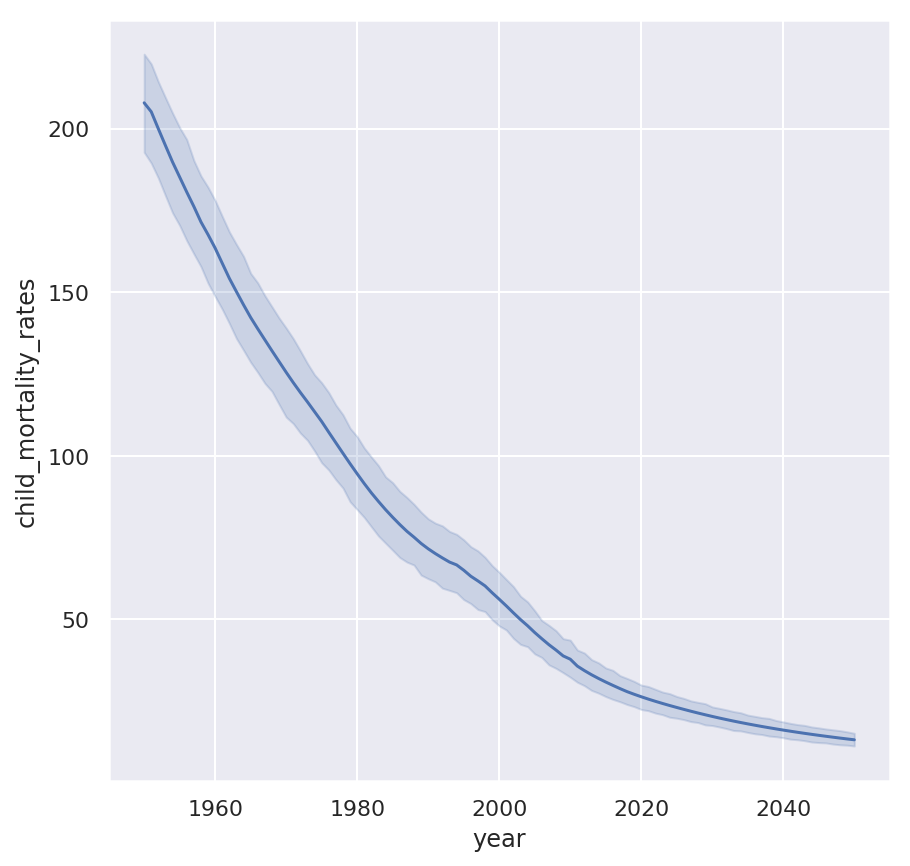

In [42]:
sns.set_context('notebook')
sns.lineplot(x='year', y='child_mortality_rates', data=mortality_rates);

*From the chart above we can conclude that the child mortality has declined over the years and is projected to keep declining, albeit at a slowly rate.*

In [43]:
def pct_change(column):
    "finds the percent change between 2021 and 1950"
    rates_1950 = mortality_rates[mortality_rates.year == 1950].set_index('country')[column]
    rates_2022 = mortality_rates[mortality_rates.year == 2022].set_index('country')[column]
    
    change = ((rates_1950 - rates_2022) / rates_1950) * 100
    return change

In [44]:
change_in_mortality_by_country = pct_change('child_mortality_rates')
change_in_mortality_by_country.sort_values()

country
Somalia                     63.987138
Chad                        65.732087
Central African Republic    67.801858
Nigeria                     69.382022
Lesotho                     70.630252
                              ...    
Hong Kong, China            98.018967
Maldives                    98.030220
Montenegro                  98.300752
San Marino                  98.562500
South Korea                 99.243836
Name: child_mortality_rates, Length: 195, dtype: float64

This table shows us that child_mortality rates have decreased in every single country since 1950, however the rate differs amongst countries. South Korea has made the most improvements while Somalia has mad the least significant improvement.

### What are the countries with the lowest and highest child mortality rates in 2022

In [45]:
#mortality rate in 2022
rates_2022 = mortality_rates[mortality_rates.year == 2022].sort_values('child_mortality_rates', ascending=False)

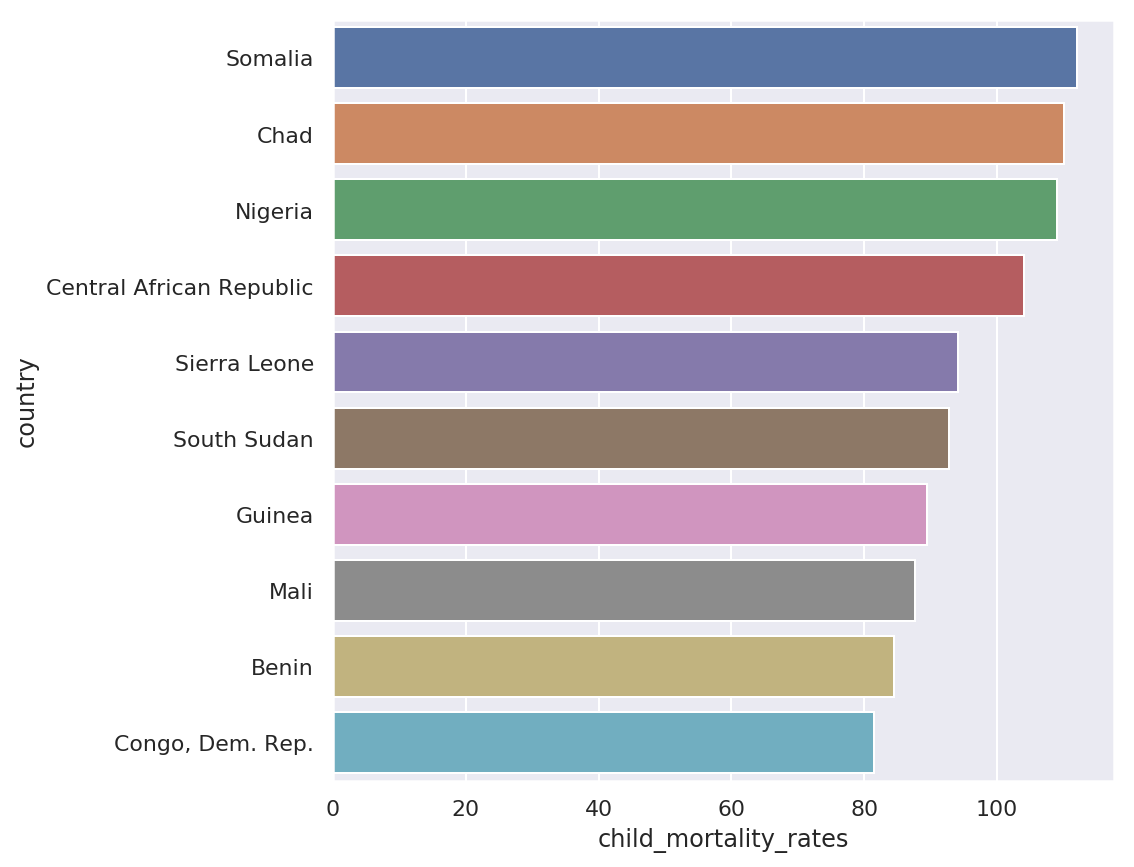

In [46]:
sns.barplot(y='country', x='child_mortality_rates', data=rates_2022.head(10));


*From the plot above we can see that the country with the highest mortality rate is* ***Somalia***

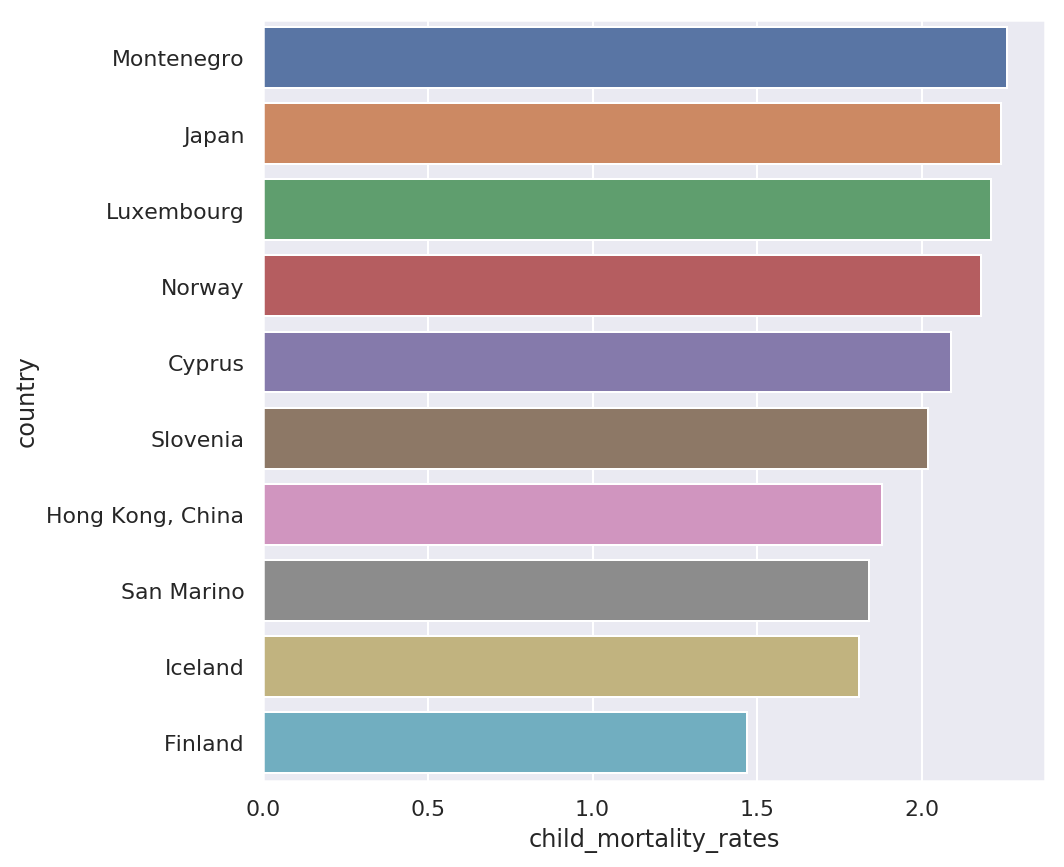

In [47]:
sns.barplot(y='country', x='child_mortality_rates', data=rates_2022.tail(10));


*From the plot above we can see that the country with the highest mortality rate is* ***Finland***

### Is there a plausible relationship between child mortality and income?

Here, we explore the possibility of a link between child mortality and income. We do this with visual exploration through scatter plots. However, to truely conclude that income impacts child mortality we consider other variables and health indicators. 

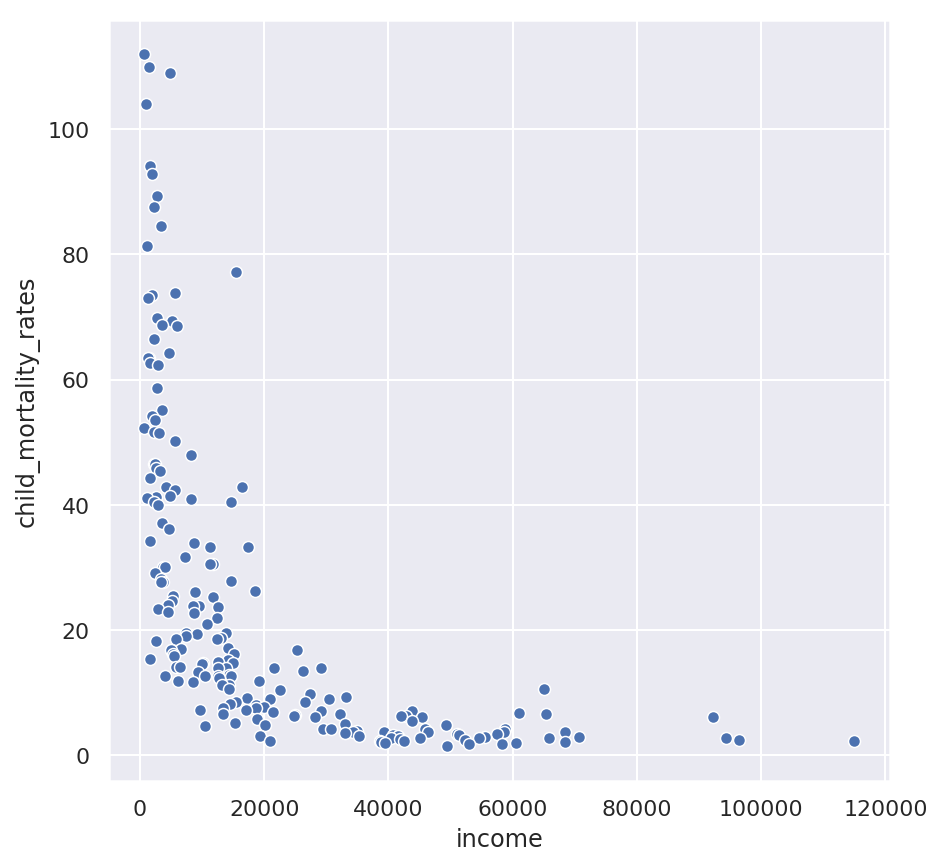

In [50]:
sns.scatterplot('income', 'child_mortality_rates', data=rates_2022)

In [52]:
#correlation
rates_2022['child_mortality_rates'].corr(rates_2022['income'])

-0.5814186919457707

The scatterplot above shows a negative correlation between child mortality and Income per person. As countries with smaller income per person seem to have relatively high child mortality rates. However, we can't conclude that this there is a clear relationship without the use of a statistical test.

<a id='conclusions'></a>
## Conclusions


We set out to find out how Child Mortality has evolved over the years and set a number of questions at the start of our analysis. We can come to the following conclusions.

1. Child Mortality has decreased significantly all over the world since 1950.
2. South Korea has made the most significant improvement since that time.
3. Today(2022) the country with the highest child mortality is Somalia.
4. The country with the lowest child mortality is Finland.
5. The seems to be a negative correlation between child mortality and income per person. As countries with smaller income per person seem to have relatively high child mortality rates. However we can't conclude on an actual relationship until we consider other variables and conduct a statistical test.

An additional limitation which is concerned with the improvement rate since 1950 is that we do not investigate why this improvements happen and so improvement rate is **NOT** an exact indicator of the countries efforts to curb ch

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])